In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ucimlrepo

In [99]:
 class Perceptron:
    
    def __init__(self, eta=0.1, n_epochs = 50, random_state = 1):
        self.eta = 0.1
        self.n_epochs = n_epochs
        self.random_state = 1

    def net_input(self, x):
        z= np.dot(x, self.w_) + self.b_
        return z
    
    def predict(self, x):
        z = self.net_input(x)
        y_hat = np.where(z >= 0.0, 1, 0)
        return y_hat


    def fit(self, X, Y):
        # 1) intialize the weights and bias
        rgen = np.random.RandomState(self.random_state)
        self.m_features = X.shape[1] 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=self.m_features) 
        self.b_ = 0.0 

        # sanity check
        self.errors_ = [] 

        # 2) update the weights and bias
        for _ in range(self.n_epochs): 
            num_miss = 0 
            for xi, yi in zip(X,Y):
                prediction_value = self.predict(xi)                
                diff = prediction_value -yi
                num_miss += int(diff != 0.0)
                delta_w = diff * xi
                delta_b = diff * 1
                self.w_ = self.w_ - self.eta * delta_w
                self.b_ = self.b_ - self.eta * delta_b
            self.errors_.append(num_miss)
        return self
        

In [100]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
# print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

In [101]:
#look at col info
X.info()      
X.describe() 
X.head()       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [102]:
y.info()
y.describe()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


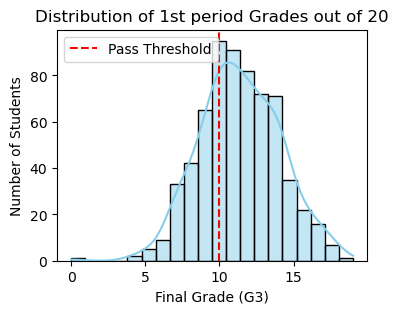

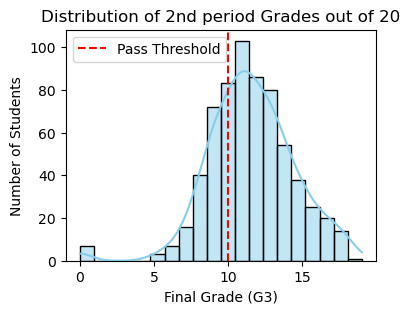

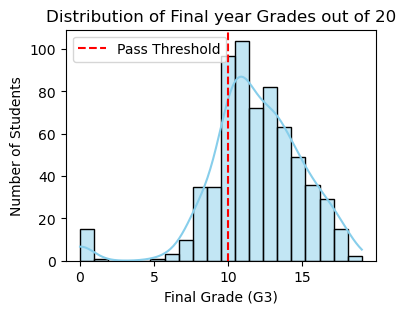

In [108]:
#show distribution of 1st period grades
plt.figure(figsize=(4,3))
sns.histplot(y['G1'], kde=True, bins=20, color='skyblue')
plt.axvline(x=10, color='red', linestyle='--', label='Pass Threshold')
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of 1st period Grades out of 20")
plt.legend()
plt.show()

#show distribution of 2nd period grades
plt.figure(figsize=(4,3))
sns.histplot(y['G2'], kde=True, bins=20, color='skyblue')
plt.axvline(x=10, color='red', linestyle='--', label='Pass Threshold')
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of 2nd period Grades out of 20")
plt.legend()
plt.show()

#show distribution of Final year grade
plt.figure(figsize=(4,3))
sns.histplot(y['G3'], kde=True, bins=20, color='skyblue')
plt.axvline(x=10, color='red', linestyle='--', label='Pass Threshold')
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final year Grades out of 20")
plt.legend()
plt.show()


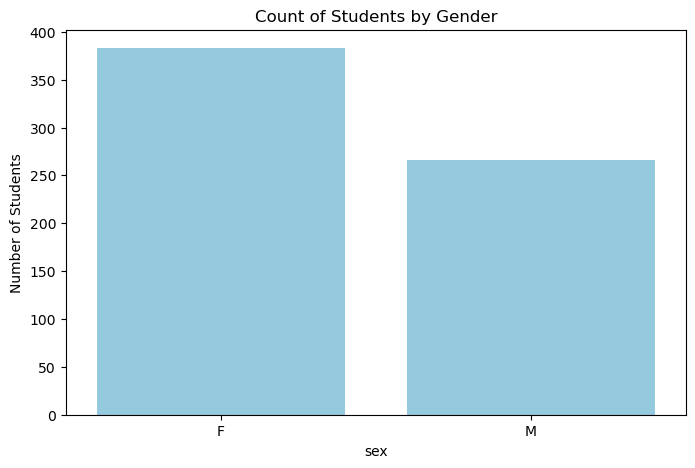

In [104]:
plt.figure(figsize=(8,5))
sns.countplot(x=X['sex'],color='skyblue')
plt.title('Count of Students by Gender')
plt.ylabel("Number of Students")
plt.show()

In [105]:
#convert target (G3) to binary
y_binary = (y['G3'] >= 10).astype(int)
y_binary.head()

0    1
1    1
2    1
3    1
4    1
Name: G3, dtype: int64

In [106]:

X_encoded = X.copy()
categorical_cols = X_encoded.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Unique values in '{col}': {np.unique(X_encoded[col])}\n")


Unique values in 'school': ['GP' 'MS']

Unique values in 'sex': ['F' 'M']

Unique values in 'address': ['R' 'U']

Unique values in 'famsize': ['GT3' 'LE3']

Unique values in 'Pstatus': ['A' 'T']

Unique values in 'Mjob': ['at_home' 'health' 'other' 'services' 'teacher']

Unique values in 'Fjob': ['at_home' 'health' 'other' 'services' 'teacher']

Unique values in 'reason': ['course' 'home' 'other' 'reputation']

Unique values in 'guardian': ['father' 'mother' 'other']

Unique values in 'schoolsup': ['no' 'yes']

Unique values in 'famsup': ['no' 'yes']

Unique values in 'paid': ['no' 'yes']

Unique values in 'activities': ['no' 'yes']

Unique values in 'nursery': ['no' 'yes']

Unique values in 'higher': ['no' 'yes']

Unique values in 'internet': ['no' 'yes']

Unique values in 'romantic': ['no' 'yes']



In [107]:

ordinal_cols = ['famsize']
X_encoded['famsize'] = X_encoded['famsize'].map({'LE3':0, 'GT3':1})

binary_nominal_cols = ['schoolsup', 'famsup', 'paid', 'activities' , 'nursery', 'higher', 'internet', 'romantic']
for col in binary_nominal_cols:
    X_encoded[col] = X_encoded[col].map({'no':0, 'yes':1})

one_hot_code_cols = ['Mjob', 'Fjob', 'reason', 'guardian', 'school', 'sex', 'address','Pstatus' ]
X_encoded = pd.get_dummies(X_encoded, columns=one_hot_code_cols, drop_first=True)
X_encoded.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,school_MS,sex_M,address_U,Pstatus_T
0,18,1,4,4,2,2,0,1,0,0,...,True,False,False,False,True,False,False,False,True,False
1,17,1,1,1,1,2,0,0,1,0,...,False,False,False,False,False,False,False,False,True,True
2,15,0,1,1,1,2,0,1,0,0,...,False,False,True,False,True,False,False,False,True,True
3,15,1,4,2,1,3,0,0,1,0,...,False,True,False,False,True,False,False,False,True,True
4,16,1,3,3,1,2,0,0,1,0,...,False,True,False,False,False,False,False,False,True,True


In [93]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_encoded_train, X_encoded_test, y_binary_train, y_binary_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Display the shape and date type of the splits
print(f"Training data shape (X_encoded_train): {X_encoded_train.shape}")
print(f"Testing data shape (X_encoded_test): {X_encoded_test.shape}")
print(f'type(X_train): {type(X_encoded_train)}')
print(f'type(Y_train): {type(y_binary_train)}')
print(f'type(X_test): {type(X_encoded_test)}')
print(f'type(Y_test): {type(y_binary_test)}')

Training data shape (X_encoded_train): (519, 39)
Testing data shape (X_encoded_test): (130, 39)
type(X_train): <class 'pandas.core.frame.DataFrame'>
type(Y_train): <class 'pandas.core.series.Series'>
type(X_test): <class 'pandas.core.frame.DataFrame'>
type(Y_test): <class 'pandas.core.series.Series'>


In [94]:
perceptron_model = Perceptron(eta = 0.01, n_epochs=20)
perceptron_model = perceptron_model.fit(X_encoded_train.values, y_binary_train.values)

Text(0.5, 1.0, 'Number of missclassified data points during the training (fitting)')

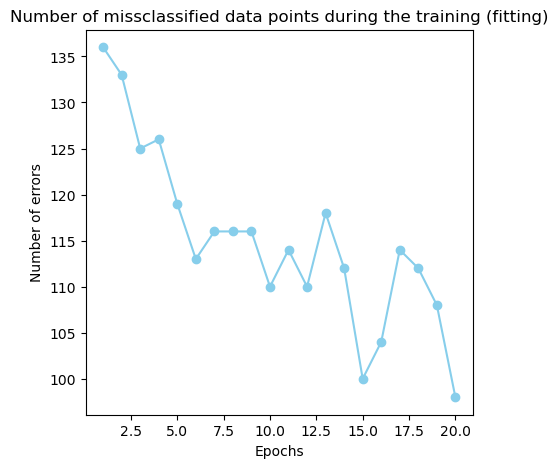

In [95]:
plt.figure(figsize=(5,5))
plt.plot(range(1, len(perceptron_model.errors_) + 1), perceptron_model.errors_, marker='o',color='skyblue')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Number of missclassified data points during the training (fitting)')

In [96]:
from sklearn.metrics import accuracy_score

Y_test_hats = []
for xi in X_encoded_test.values:
    y_hat = perceptron_model.predict(xi)
    Y_test_hats.append(y_hat)

equal = [ y_hat == y for y_hat, y in zip(Y_test_hats, y_binary_test)]
print("Are the predicted and actual label of testing set equal?")
print(equal)

accuracy = accuracy_score(np.array(Y_test_hats), y_binary_test.values)
print(f"Accuracy of the testing set: {accuracy * 100:.2f}%")  

Are the predicted and actual label of testing set equal?
[np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, n